# Trabajo práctico 2
**Inteligencia Artificial - CEIA - FIUBA**

## Autores

- **Mealla Pablo**.
- **Mendoza Dante**.
- **Vasquez Jorge**.
- **Viñas Gustavo**.

## California Housing

Este es un popular [dataset](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset) que vamos a estar leyendo desde **Scikit-Learn**.

Se requiere construir una regresión que nos permita predecir el valor de valor medio de casas en distritos de California (medidos en ciento de miles de dólares $100.000). Este dataset deriva del censo de 1990 de EEUU, donde cada observación es un bloque. Un bloque es la unidad geográfica más pequeña para la cual la Oficina del Censo de EE. UU. publica datos de muestra (un bloque típicamente tiene una población de 600 a 3,000 personas).

Un hogar es un grupo de personas que residen dentro de una casa. Dado que el número promedio de habitaciones y dormitorios en este conjunto de datos se proporciona por hogar, estas columnas pueden tomar valores grandes para grupos de bloques con pocos hogares y muchas casas vacías.

Los atributos en el orden que se guardaron en el dataset son:

- `MedInc`: Ingreso medio en el bloque
- `HouseAge`: Edad mediana de las casas en el bloque
- `AveRooms`: Número promedio de habitaciones por hogar.
- `AveBedrms`: Número promedio de dormitorios por hogar.
- `Population`: Población del bloque
- `AveOccup`: Número promedio de miembros por hogar.
- `Latitude`: Latitud del bloque
- `Longitude`: Longitud del bloque

In [1]:
# Cargamos las bibliotecas que vamos a utilizar.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge

sns.set()

In [2]:
# Leemos el dataset
california_housing = fetch_california_housing()

# Y obtenemos los atributos y target
X = california_housing.data
y = california_housing.target

# Transformamos en Pandas
X = pd.DataFrame(X, columns=california_housing['feature_names'])
y = pd.Series(y, name=california_housing['target_names'][0])

# Unimos a X e y, esto ayuda a la parte de la gráfica del mapa de calor de correlación
df_california = pd.concat([X, y], axis=1)

In [3]:
df_california.head() # Vemos si la union de los datos x e y es correcta.

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### 🔍 Exploración de datos

In [4]:
# Corroboramos si hay valores nulos.
print("Valores nulos encontrados: \n", df_california.isnull().sum())

# Vemos informacion estadistica basica.
df_california.describe()

Valores nulos encontrados: 
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### 🔍 Análisis de correlación y mapa de calor

Respondiendo el punto 1 de la guía de preguntas, en la matriz de correlación generada, se puede apreciar que hay una alta correlación entre el target y MedInc con un valor de 0,69. Lo interpretamos como que a mayor ingreso promedio, más cara es la vivienda. Por otra parte, también se puede apreciar que hay una fuerte correlación positiva entre AveRooms y AveBedrms, esto lo podemos interpretar de forma lógica como que una casa con más habitaciones generalmente tiene más dormitorios. También, se puede apreciar una fuerte correlación negativa entre Latitude y Longitude, esto no logramos interpretarlo de forma natural como el caso anterior, quizás sea un indicador de ubicación en la zona de California.

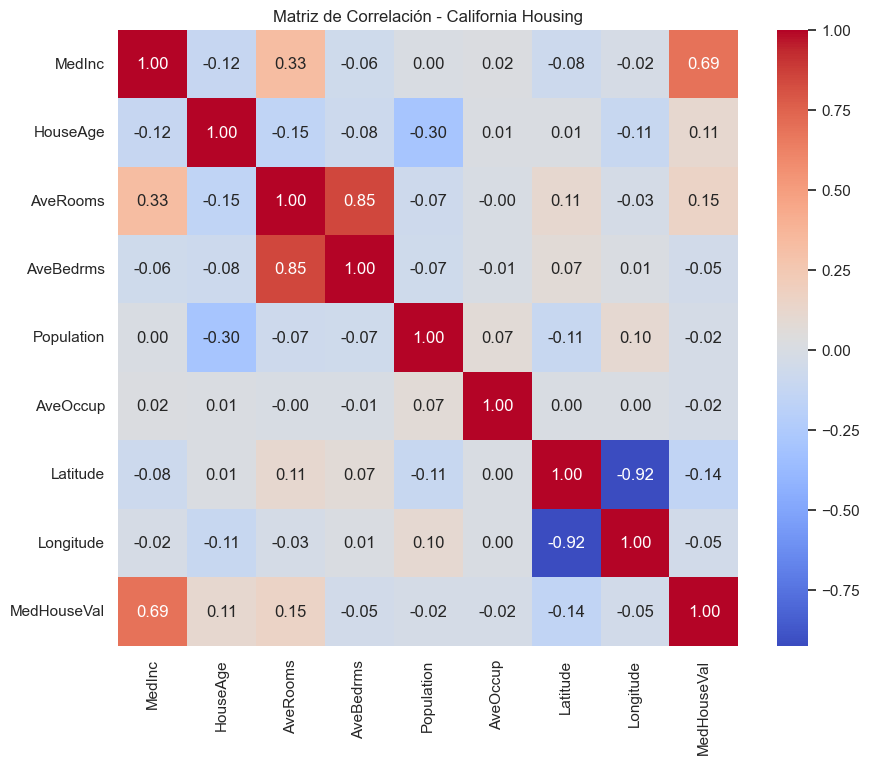

Atributo con mayor correlación con el target: MedInc con 0.6880752079585484


In [5]:
# Correlación entre atributos y el target
correlation_matrix = df_california.corr()

# Mapa de calor
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Matriz de Correlación - California Housing")
plt.show()

# Atributo con mayor correlación con el target
cor_target = correlation_matrix['MedHouseVal'].drop('MedHouseVal')
print("Atributo con mayor correlación con el target:", cor_target.idxmax(), "con", cor_target.max())


### 📊 Histogramas de atributos y target
Respondiendo el punto 2 de la guía de preguntas, en los gráficos de los histograma, en el atributo MedInc y MedHouseVal  se logra divisar una forma de campana. En el caso de HouseAge podría asemejarse también a una campana pero tiene una forma más errática. En el resto de casos, no logramos distinguir alguna forma particular.

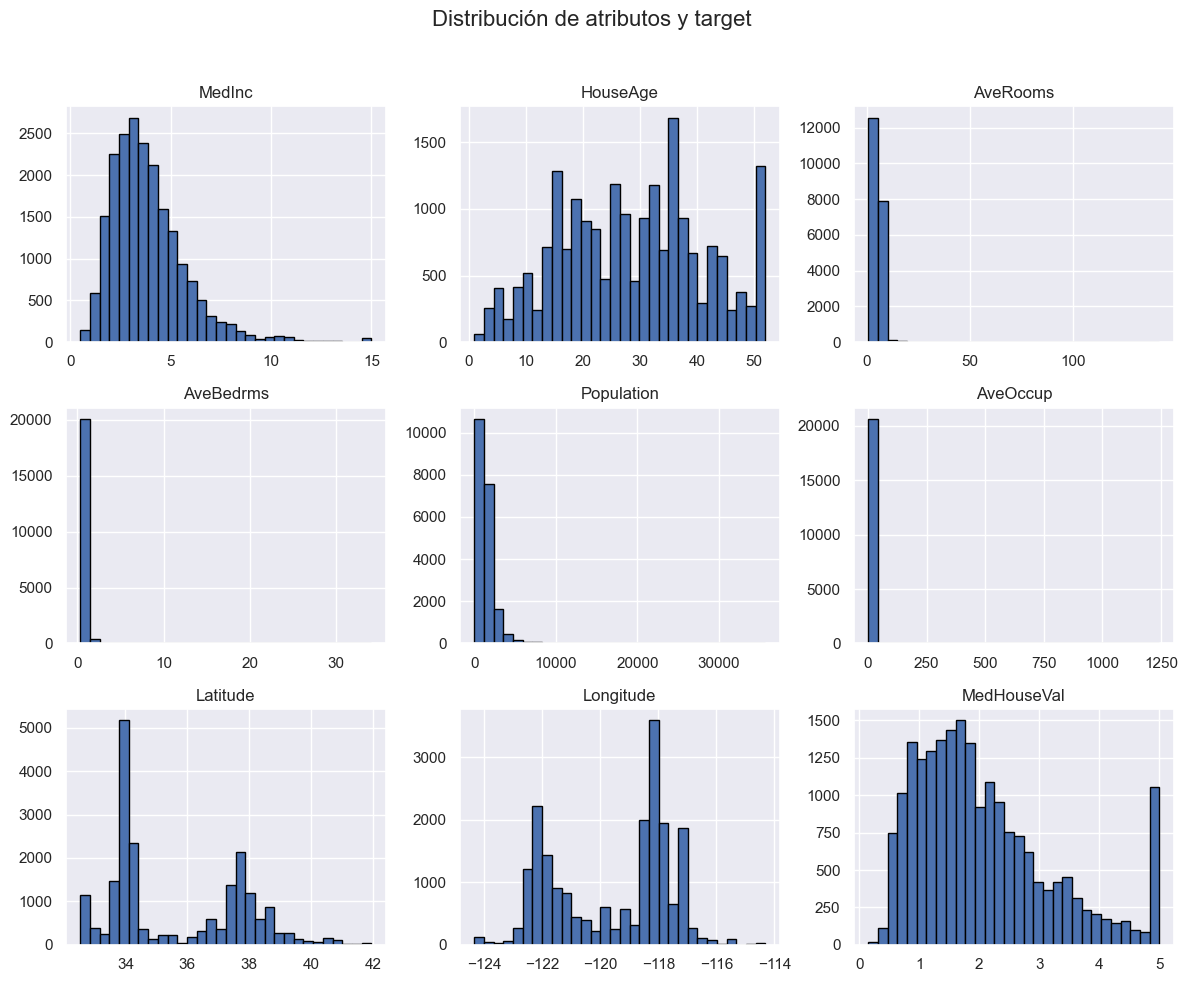

In [6]:
# Histogramas de todos los atributos + target
df_california.hist(bins=30, figsize=(12, 10), edgecolor='black')
plt.suptitle("Distribución de atributos y target", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### 📈 Regresión Lineal
Respondiendo el punto 3 de la guía de preguntas, Podemos ver los valores del modelo de regresión lineal y analizar la varianza total y la varianza explicada por el modelo. Dichos valores son: 

Varianza total del target: 1.3398
Varianza explicada por el modelo: 0.6093

Con esto podemos calcular el R cuadrado, que es del 45% (Varianza explicada / Varianza total), que sería la confiabilidad de nuestro modelo, lo cual no es muy alentador. Esto nos indica que no está capturando gran parte del comportamiento del target. Lo que nos sugiere que podríamos hacer mejoras o aplicar técnicas para lograr mejores resultados.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score

# División en conjunto de entrenamiento y prueba
X = df_california.drop('MedHouseVal', axis=1)
y = df_california['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Escalado de los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenamiento del modelo de regresión lineal
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train_scaled, y_train)

# Predicciones
y_pred_train = modelo_lineal.predict(X_train_scaled)
y_pred_test = modelo_lineal.predict(X_test_scaled)

# Varianza total y varianza explicada
var_total = y_train.var()
var_explicada = explained_variance_score(y_train, y_pred_train)

print(f"Varianza total del target en entrenamiento: {var_total:.4f}")
print(f"Varianza explicada por el modelo: {var_explicada:.4f}")

Varianza total del target en entrenamiento: 1.3398
Varianza explicada por el modelo: 0.6093


### 📊 Evaluación del modelo lineal
Respondiendo el punto 4 de la guía de preguntas, Calculamos las métricas de MSE, MAE y R² para el conjunto de evaluación.

In [9]:
# Evaluación con el conjunto de test
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

MSE: 0.5306
MAE: 0.5272
R²: 0.5958


### 🧱 Regresión Ridge con validación cruzada
Respondiendo el punto 5 de la guía de preguntas, Hicimos una validación cruzada, el gráfico de MSE vs alpha y calculamos el mejor valor de alpha que fue de 3.0303

Mejor valor de alpha: 3.0303


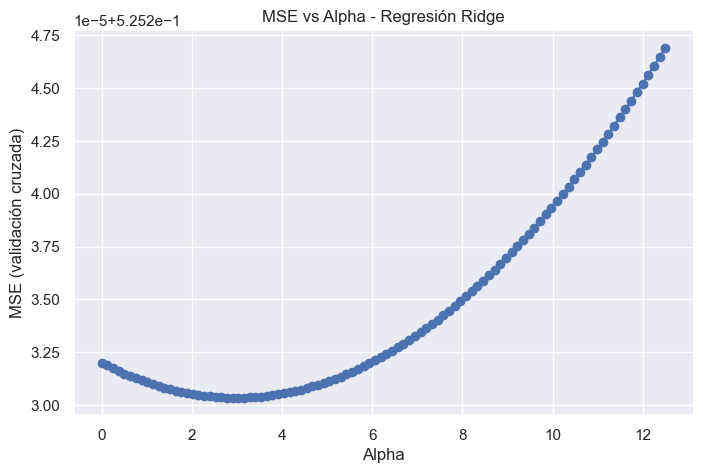

In [10]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Valores de alpha a probar
alphas = np.linspace(0, 12.5, 100)
mse_scores = []

# Validación cruzada con escalado dentro del pipeline
kf = KFold(n_splits=5, shuffle=True, random_state=42)

for alpha in alphas:
    ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=alpha))
    neg_mse = cross_val_score(ridge_pipeline, X_train, y_train, cv=kf, scoring='neg_mean_squared_error')
    mse_scores.append(-neg_mse.mean())

# Mejor alpha
best_alpha = alphas[np.argmin(mse_scores)]
print(f"Mejor valor de alpha: {best_alpha:.4f}")

# Gráfico de MSE vs alpha
plt.figure(figsize=(8, 5))
plt.plot(alphas, mse_scores, marker='o')
plt.xlabel('Alpha')
plt.ylabel('MSE (validación cruzada)')
plt.title('MSE vs Alpha - Regresión Ridge')
plt.grid(True)
plt.show()

### 🧪 Evaluación del mejor modelo Ridge

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Crear pipeline con escalado + Ridge
mejor_ridge_pipeline = make_pipeline(StandardScaler(), Ridge(alpha=best_alpha))
mejor_ridge_pipeline.fit(X_train, y_train)
y_pred_ridge = mejor_ridge_pipeline.predict(X_test)

# Evaluación en test
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"[Ridge] MSE: {mse_ridge:.4f}")
print(f"[Ridge] MAE: {mae_ridge:.4f}")
print(f"[Ridge] R²: {r2_ridge:.4f}")

[Ridge] MSE: 0.5305
[Ridge] MAE: 0.5272
[Ridge] R²: 0.5958


### ⚖️ Comparación entre regresión lineal y Ridge

In [12]:
print("Comparación de métricas en el conjunto de evaluación:")
print(f"Modelo Lineal -> MSE: {mse:.4f} | MAE: {mae:.4f} | R²: {r2:.4f}")
print(f"Modelo Ridge  -> MSE: {mse_ridge:.4f} | MAE: {mae_ridge:.4f} | R²: {r2_ridge:.4f}")

Comparación de métricas en el conjunto de evaluación:
Modelo Lineal -> MSE: 0.5306 | MAE: 0.5272 | R²: 0.5958
Modelo Ridge  -> MSE: 0.5305 | MAE: 0.5272 | R²: 0.5958



### 🧠 Análisis y respuesta del punto 6 de la guia

**¿Cuál de los dos modelos da mejores resultados (usando MSE y MAE)?**

Según los resultados obtenidos, no vemos una gran mejora al usar Ridge cuando menos para este caso. Entendemos que Ridge introduce una penalización (regularización L2) que reduce la magnitud de los coeficientes y controla el sobreajuste, pero como mencionamos, la mejora es muy pequeña (solo en el MSE). Con lo cual deberíamos probar con otras técnicas o mejorar los datos utilizados como quitar aquellas columnas que tienen alta correlación con otras y comprobar si mejora el modelo.